# Компьютерное зрение

В качестве базовой задачи CV (Computer Vision) возьмем задачу классификации рукописный цифр из набора данных [MNIST](https://www.kaggle.com/c/digit-recognizer)

Примеры изображений из этого набора данных представлены на рисунке.

In [7]:
from IPython.display import Image
Image(url='https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png', width=500, )

Каждое изображение имеет разрешение 28x28 пикселов. Каждый пиксел закодирован одним байтом, который определяет оттенок серого (0 - черный, 255 - белый)

## Загрузка данных

Набора данных MNIST настолько популярен, что в библиотеке tensorflow уже есть готовая функция, которая скачает его из сети и загрузит в виде подготовленных массивов, разделенных на обучающую и проверочную выборки

In [8]:
import numpy as np
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

## Нейронные сети

Алгоритмы компьютерного зрения, основанные на нейронных сетях хорошо себя зарекомендовали на практике. Для решения данный задачи мы используем 2 типа нейронных сетей: полносвзный перцептрон и сверточная нейронная сеть.

## Однослойный перцептрон

Данная архитекутра представляет собой известный алгоритм логистической регресси, но записаный в виде нейронной сети.

In [11]:
Image(url='https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2017-11-07-at-10.35.52-AM.png')

## Полносвязный многослойный перцептрон
Multilayer Perceptron (MLP) - архитектура НС, при которой каждый нейрон одного слоя связан со всеми нейроннами последующего слоя.

Пример такой архитектуры для 2-х слоев представлен на рисунке.

In [10]:
Image(url='https://miro.medium.com/max/1400/1*-IPQlOd46dlsutIbUq1Zcw.png')

### Матричное представление 

In [12]:
Image(url='https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2017-11-07-at-12.32.19-PM.png')

Первая сеть, которую мы будем обучать состоит из 2-х слоев. В первом слое 128 ячеек, во втором слое 10 - по числу выходных классов.

В качестве функции активации для первого слоя будем использовать сигмоиду $\sigma(z)$, а для второго слоя специальную функцию $softmax(z)$, которая нормирует выходы нейросети, чтобы их можно было трактовать как распределение вероятностей.

Для принятия решения об конкретном классе выбирают номер выходной ячейки, вероятность которой является наибольшей из всех.

Таким образом наша архитектура представляет собой последовательность следующих операций
$$
z_1 = W_1 x \\
o_1 = \sigma(z) \\
z_2 = W_2 o_1 \\
o_2 = softmax(z2) \\
$$


### Предобработка данных

Для данной сети мы развернем двумерные изображения в одномерный вектор и отнормируем значений признаков от 0 до 1.

In [33]:
x_train = X_train.reshape(-1, 28*28)
x_test = X_test.reshape(-1, 28*28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Обучение сети

Для обучения будем использовать API keras из библиотеки tensorflow. Данное API позволяет сконструировать произвольную архитектуру сети и запустить для нее обучающий алгоритм, который называется обратное распространение ошибки и представляет собой обобщение метода градиентного спуска.

In [34]:
from keras import Sequential
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

batch_size = 128
num_classes = 10
epochs = 20


model = Sequential()
model.add(Dense(128, use_bias=False, activation='sigmoid', input_shape=(x_train.shape[1],)))
model.add(Dense(num_classes, use_bias=False, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               100352    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1280      
Total params: 101,632
Trainable params: 101,632
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5263 - accuracy: 0.8724 - val_loss: 0.2782 - val_accuracy: 0.9216
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2487 - accuracy: 0.9292 - val_loss: 0.2105 - val_accuracy: 0.9402
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1972 - accuracy: 0.9428 - val_loss: 0.1783 - val_accuracy: 0.9470
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1645 - accuracy: 0.9524 - val_loss: 0.1538 - val_accuracy: 0.9557
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1409 - accuracy: 0.9592 - val_loss: 0.1373 - val_accuracy: 0.9595
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1228 - accuracy: 0.9644 - val_loss: 0.1240 - val_accuracy: 0.9630
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1085 - accuracy: 0.9688 - val_loss: 0.1163 - val_accuracy: 0.9645
Epoch 

Populating the interactive namespace from numpy and matplotlib


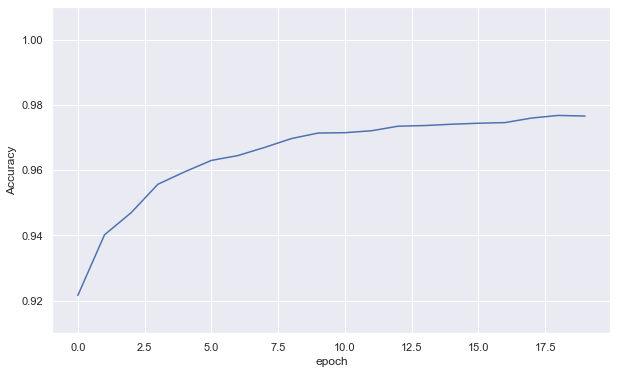

In [36]:
%pylab inline
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.ylim(0.91, 1.01);

## Сохранение весом нейронной сети

Веса каждого из слоев представляют собой матрицы. Извлечем коэффициенты этих матриц и сохраним в текстовые файлы.

In [37]:
w1 = model.layers[0].get_weights()[0]
w2 = model.layers[1].get_weights()[0]
print(f"w1.shape: {w1.shape}, w2.shape: {w2.shape}")

w1.shape: (784, 128), w2.shape: (128, 10)


In [38]:
np.savetxt("w1.txt", w1)
np.savetxt("w2.txt", w2)

## Генерация тестовых данных
Для проверки корректности переноса инференса в код на C++. Сохраним предсказания вероятностей и классов в файлах вместе с признаками для сотни изображений.

In [39]:
X_test_subset = X_test[:100].reshape(-1, 28*28)
y_pred = model.predict(X_test_subset.astype('float32') / 255)
np.savetxt("test_mnist_mlp.txt", np.hstack((y_pred, X_test_subset)), fmt="%g")
y_pred_class = np.argmax(y_pred, axis=1)
np.savetxt("test_mnist_mlp_classes.txt", np.hstack((y_pred_class.reshape(-1, 1), X_test_subset)), fmt="%g")

## Сверточная нейронная сеть

Данный тип архитектуры хорошо подходит для обработки изображений.

### Предобработка признаков

Серточные сети обычно работают с двумерными изображениями. Поэтому для этого типа сетей мы выполним только нормировку признаков.

In [41]:
x_train.shape

(60000, 28, 28)

In [43]:
x_train = X_train.astype('float32').reshape(-1, 28, 28, 1) / 255
x_test = X_test.astype('float32').reshape(-1, 28, 28, 1) / 255

In [45]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Input

cnn_model = Sequential()
cnn_model.add(Input(shape=x_train.shape[1:], name="input"))
cnn_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
# cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(num_classes, activation='softmax', name="output"))

cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               204928    
_________________________________________________________________
output (Dense)               (None, 10)               

In [46]:
cnn_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 37s 77ms/step - loss: 0.1881 - accuracy: 0.9432 - val_loss: 0.0783 - val_accuracy: 0.9733
Epoch 2/20
469/469 [==============================] - 35s 74ms/step - loss: 0.0493 - accuracy: 0.9849 - val_loss: 0.0348 - val_accuracy: 0.9880
Epoch 3/20
469/469 [==============================] - 33s 71ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0302 - val_accuracy: 0.9892
Epoch 4/20
469/469 [==============================] - 33s 70ms/step - loss: 0.0247 - accuracy: 0.9927 - val_loss: 0.0270 - val_accuracy: 0.9908
Epoch 5/20
469/469 [==============================] - 36s 77ms/step - loss: 0.0185 - accuracy: 0.9943 - val_loss: 0.0321 - val_accuracy: 0.9896
Epoch 6/20
469/469 [==============================] - 34s 73ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.0249 - val_accuracy: 0.9918
Epoch 7/20
469/469 [==============================] - 35s 74ms/step - loss: 0.0112 - accuracy: 0.9967 - val_loss: 0.0359 - val_accuracy:

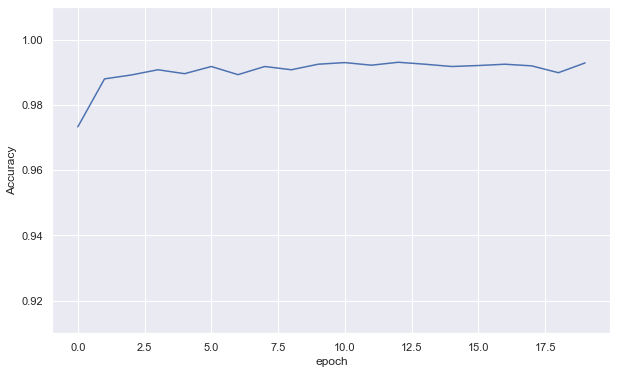

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.ylim(0.91, 1.01);

### Сохранение модели
Для хранения модели Tensorflow использует собственный формат SavedModel. Создается директория, в которой располагаются различные файлы и поддиректории, прдставляющие собой модели и различные параметры.

In [48]:
cnn_model.save("saved_model")

2021-08-17 11:14:10.598304: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/assets


### Генерация данных для тестирования

In [49]:
x_test_subset = x_test[:100]
y_pred = cnn_model.predict(x_test_subset.reshape(-1, 28, 28, 1).astype('float32') / 255)
np.savetxt("test_mnist_cnn.txt", np.hstack((y_pred, x_test_subset.reshape(-1, 28*28))), fmt="%g")
y_pred_class = np.argmax(y_pred, axis=1)
np.savetxt("test_mnist_cnn_classes.txt", np.hstack((y_pred_class.reshape(-1, 1), x_test_subset.reshape(-1, 28*28))), fmt="%g")